In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# model
from tensorflow.keras.models import Model
# layers
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

# linear algebra
import numpy as np
# data manipulation
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
# dataset
from tensorflow.keras.datasets import cifar100

TensorFlow 2.x selected.


In [0]:
# Firstly, let's import the data and look at the shapes.
cifar100_data = cifar100.load_data(label_mode = 'coarse') # this returns a tuple. First one is train set and the second one is test set
(x_train, y_train), (x_test, y_test) = cifar100_data


print('Shape of the X: \n Test: {} | Train: {}'.format(x_test.shape, x_train.shape))
print('Shape of the Y: \n Test: {} | Train: {}'.format(y_test.shape, y_train.shape))

169009152/169001437 [==============================] - 13s 0us/step
Shape of the X: 
 Test: (10000, 32, 32, 3) | Train: (50000, 32, 32, 3)
Shape of the Y: 
 Test: (10000, 1) | Train: (50000, 1)


# Preprocessing the data
The X data has the RGB values of pixels and these values are in between 0 and 255. The low variance (or std) is better so if I divide these values by 255, this will reduce the range of the RGB values between [0,1]. Also if the values are low that means much lower std and variance


In [0]:
x_test, x_train = x_test / 255.0, x_train / 255.0
print('x_train std: {} | x_train mean: {}'.format(x_train.std(), x_train.mean()))
print('x_test std: {} | x_test mean: {}'.format(x_test.std(), x_test.mean()))

x_train std: 0.2681919866233316 | x_train mean: 0.47818062530637245
x_test std: 0.26913948539829974 | x_test mean: 0.47937721239276854


In [0]:
# flatten y (?)
y_train, y_test = y_train.flatten(), y_test.flatten()
print('Y shape: \n Train: {}, Test: {}'.format(y_train.shape, y_test.shape))

Y shape: 
 Train: (50000,), Test: (10000,)


In [0]:
# Shape of the data

print('Shape of the X: \n Test: {} | Train: {}'.format(x_test.shape, x_train.shape))
print('Shape of the Y: \n Test: {} | Train: {}'.format(y_test.shape, y_train.shape))

# STD and Mean of X 
print('X.mean(): train: {}, test:{}'.format(x_train.mean(), x_test.mean()))
print('X.std(): train: {}, test:{}'.format(x_train.std(), x_test.std()))

Shape of the X: 
 Test: (10000, 32, 32, 3) | Train: (50000, 32, 32, 3)
Shape of the Y: 
 Test: (10000,) | Train: (50000,)
X.mean(): train: 0.47818062530637245, test:0.47937721239276854
X.std(): train: 0.2681919866233316, test:0.26913948539829974


# Build the Model

In [0]:
# Now we can build the model

i = Input(shape = x_train[0].shape)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)


x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(.4)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(.2)(x)
x = Dense(20, activation = 'softmax')(x)

model = Model(i, x)
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
# fit the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 34s 676us/sample - loss: 2.4584 - accuracy: 0.2755 - val_loss: 2.0346 - val_accuracy: 0.3763
Epoch 2/100
50000/50000 [==============================] - 26s 518us/sample - loss: 1.9342 - accuracy: 0.4029 - val_loss: 1.7349 - val_accuracy: 0.4608
Epoch 3/100
50000/50000 [==============================] - 26s 514us/sample - loss: 1.6689 - accuracy: 0.4807 - val_loss: 1.5909 - val_accuracy: 0.5081
Epoch 4/100
50000/50000 [==============================] - 26s 519us/sample - loss: 1.4751 - accuracy: 0.5352 - val_loss: 1.4351 - val_accuracy: 0.5493
Epoch 5/100
50000/50000 [==============================] - 26s 518us/sample - loss: 1.3127 - accuracy: 0.5807 - val_loss: 1.3431 - val_accuracy: 0.5810
Epoch 6/100
50000/50000 [==============================] - 26s 515us/sample - loss: 1.1639 - accuracy: 0.6264 - val_loss: 1.2662 - val_accuracy: 0.6014
Epoch 7/100
50000/50000 [=============

# Data Augmentation
Now I'll recreate everything with data augmentation


In [0]:

ii = Input(shape = x_train[0].shape)
xx = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(ii)
xx = BatchNormalization()(xx)
xx = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(xx)
xx = BatchNormalization()(xx)
xx = MaxPooling2D((2,2))(xx)


xx = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(xx)
xx = BatchNormalization()(xx)
xx = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(xx)
xx = BatchNormalization()(xx)
xx = MaxPooling2D((2,2))(xx)

xx = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(xx)
xx = BatchNormalization()(xx)
xx = Conv2D(256, (3,3), padding = 'same', activation = 'relu')(xx)
xx = BatchNormalization()(xx)
xx = MaxPooling2D((2,2))(xx)

xx = Flatten()(xx)
xx = Dropout(.4)(xx)

xx = Dense(1024, activation = 'relu')(xx)
xx = Dropout(.2)(xx)
xx = Dense(20, activation = 'softmax')(xx)

CNN = Model(ii, xx)
# compile the model
CNN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])


In [0]:
# Data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
rr = CNN.fit(train_generator, validation_data = (x_test, y_test), steps_per_epoch=steps_per_epoch, epochs = 100)

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/100
1562/1562 [==============================] - 35s 22ms/step - loss: 2.4981 - accuracy: 0.2583 - val_loss: 2.3617 - val_accuracy: 0.2937
Epoch 2/100
1562/1562 [==============================] - 34s 22ms/step - loss: 2.0331 - accuracy: 0.3714 - val_loss: 1.8530 - val_accuracy: 0.4221
Epoch 3/100
1562/1562 [==============================] - 34s 22ms/step - loss: 1.7968 - accuracy: 0.4411 - val_loss: 1.8612 - val_accuracy: 0.4249
Epoch 4/100
1562/1562 [==============================] - 34s 22ms/step - loss: 1.6203 - accuracy: 0.4922 - val_loss: 1.6838 - val_accuracy: 0.4835
Epoch 5/100
1562/1562 [==============================] - 33s 21ms/step - loss: 1.4975 - accuracy: 0.5310 - val_loss: 1.4830 - val_accuracy: 0.5304
Epoch 6/100
1562/1562 [==============================] - 33s 21ms/step - loss: 1.3959 - accuracy: 0.5626 - val_loss: 1.3957 - val_accuracy: 0.5664
Epoch 7/100
1562/1562 [======================

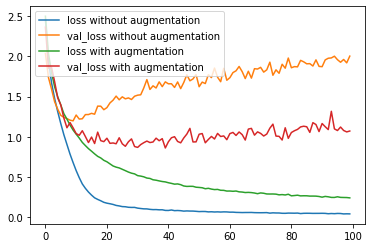

In [0]:
plt.plot(r.history['loss'], label = 'loss without augmentation')
plt.plot(r.history['val_loss'], label = 'val_loss without augmentation')
plt.plot(rr.history['loss'], label = 'loss with augmentation')
plt.plot(rr.history['val_loss'], label = 'val_loss with augmentation')
plt.legend()
plt.show()

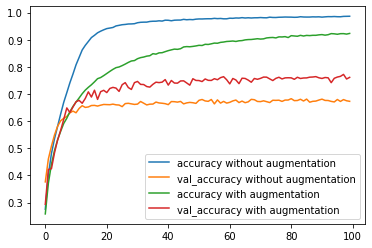

In [0]:
plt.plot(r.history['accuracy'], label = 'accuracy without augmentation')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy without augmentation')
plt.plot(rr.history['accuracy'], label = 'accuracy with augmentation')
plt.plot(rr.history['val_accuracy'], label = 'val_accuracy with augmentation')
plt.legend()
plt.show()

In [0]:
p_with_data_augmentation = CNN.predict(x_test).argmax(axis = 1)
p_without_data_augmentation = model.predict(x_test).argmax(axis = 1)

In [0]:
labels = "aquatic mammals, fish, flowers, food containers, fruit and vegetables, household electrical devices, household furniture, insects, large carnivores, large man-made outdoor things, large natural outdoor scenes, large omnivores and herbivores, medium-sized mammals, non-insect invertebrates, people, reptiles, small mammals, trees, vehicles 1, vehicles 2".split(', ')
labels = sorted(labels)

With data augmentation


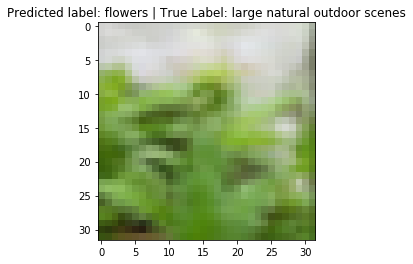

Without data augmentation


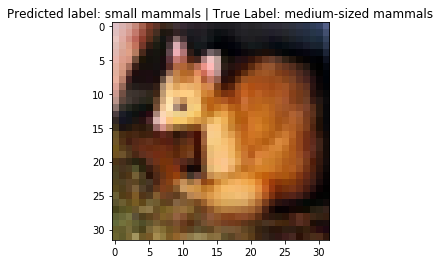

In [0]:
# misclassified examples from with and without data augmentation approach
# with data augmentation
da_idx = np.where(p_with_data_augmentation != y_test)[0]
random_1 = np.random.choice(da_idx)
plt.imshow(x_test[random_1])
print('With data augmentation')
plt.title('Predicted label: {} | True Label: {}'.format(labels[p_with_data_augmentation[random_1]], labels[y_test[random_1]]))
plt.show()
# without data augmentation
noda_idx = np.where(p_without_data_augmentation != y_test)[0]
random_2 = np.random.choice(noda_idx)
print('Without data augmentation')
plt.imshow(x_test[random_2])
plt.title('Predicted label: {} | True Label: {}'.format(labels[p_without_data_augmentation[random_2]], labels[y_test[random_2]]))
plt.show()

In [0]:
print(len(da_idx))
print(len(noda_idx))

2387
3269


In [0]:
print(CNN.evaluate(x_test, y_test))
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 167us/sample - loss: 1.0717 - accuracy: 0.7613
[1.0717097408294678, 0.7613]
10000/10000 [==============================] - 2s 166us/sample - loss: 2.0023 - accuracy: 0.6731
[2.0022676071166994, 0.6731]
